# Data set analysis 

500k filtered samples for each class. 

In [3]:
# Importing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from os import path 

import sys

import tensorflow

from tensorflow.python.eager.context import num_gpus
sys.path.append("../..")
from DexterousManipulation.training.data_loader import load_reachable_from_data_set, load_all_from_data_set, load_filtered_data
from DexterousManipulation.training.custom_data_loader import load_rand_seq_data_rand_redraw, load_filtered_class_data

from mpl_toolkits import mplot3d # For 3D plotting 

from matplotlib.patches import Rectangle

## Data locations 

In [4]:
# Misc Hyper-parameters 
apply_one_hot_encoding = False 
num_bins = 100 # for histogram 
num_samples_per_class = 500000    # 500K samples per class 

# Base path
basepath = path.abspath('')

# Folders where the raw class data is located 
data_set_folder_big_cube = "DATA_SET_BIG_CUBE"
data_set_folder_medium_cube = "DATA_SET_MEDIUM_CUBE"
data_set_folder_small_cube = "DATA_SET_SMALL_CUBE"
data_set_folder_cyli = "DATA_SET_CYLINDER"

# Folders in which the respective class data analysis information is saved 
folder_saving_str_big_cube = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set/BIG_CUBE" ))
folder_saving_str_medium_cube = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set/MEDIUM_CUBE" ))
folder_saving_str_small_cube = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set/SMALL_CUBE" ))
folder_saving_str_cyli = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set/CYLINDER" ))

folder_saving_str_general = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set" ))

## Loading the raw data 

In [5]:
# Loading data for big cube 
filtered_metrics_big_cube, filtered_hand_infos_big_cube, time_taken_big_cube = load_filtered_class_data(
                                                                                    folder_name = data_set_folder_big_cube,
                                                                                    nb_samples = num_samples_per_class)

# Loading time 
print("Time needed to load the data (in seconds) for the big cube: ", time_taken_big_cube)
# Displaying total number of samples 
print("Number of loaded samples for big cube", len(filtered_metrics_big_cube))

Time needed to load the data (in seconds) for the big cube:  26.4232075214386
Number of loaded samples for big cube 500000


In [6]:
# Loading data for medium cube 
filtered_metrics_medium_cube, filtered_hand_infos_medium_cube, time_taken_medium_cube = load_filtered_class_data(
                                                                                    folder_name = data_set_folder_medium_cube,
                                                                                    nb_samples = num_samples_per_class)

# Loading time 
print("Time needed to load the data (in seconds) for the big cube: ", time_taken_medium_cube)
# Displaying total number of samples 
print("Number of loaded samples for big cube", len(filtered_metrics_medium_cube))

Time needed to load the data (in seconds) for the big cube:  21.089380979537964
Number of loaded samples for big cube 500000


In [7]:
# Loading data for small cube 
filtered_metrics_small_cube, filtered_hand_infos_small_cube, time_taken_small_cube = load_filtered_class_data(
                                                                                    folder_name = data_set_folder_small_cube,
                                                                                    nb_samples = num_samples_per_class)

# Loading time 
print("Time needed to load the data (in seconds) for the small cube: ", time_taken_small_cube)
# Displaying total number of samples 
print("Number of loaded samples for small cube", len(filtered_metrics_small_cube))

Time needed to load the data (in seconds) for the small cube:  11.319167375564575
Number of loaded samples for small cube 500000


In [8]:
# Loading data for cylinder
filtered_metrics_cyli, filtered_hand_infos_cyli, time_taken_cyli = load_filtered_class_data(
                                                                                    folder_name = data_set_folder_cyli,
                                                                                    nb_samples = num_samples_per_class)

# Loading time 
print("Time needed to load the data (in seconds) for the cylinder: ", time_taken_cyli)
# Displaying total number of samples 
print("Number of loaded samples for cylinder", len(filtered_metrics_cyli))

Time needed to load the data (in seconds) for the cylinder:  21.30057954788208
Number of loaded samples for cylinder 500000


## Processing the data 

Multiplying all joint distances by a 100, such that the units are in cm, which has better readability for the illustrations 

In [9]:
# Multiplying metrics by 100, as cm are more readable
for index in range(num_samples_per_class): 
    filtered_metrics_big_cube[index] = filtered_metrics_big_cube[index] * 100 
    
for index in range(num_samples_per_class): 
    filtered_metrics_medium_cube[index] = filtered_metrics_medium_cube[index] * 100 

for index in range(num_samples_per_class): 
    filtered_metrics_small_cube[index] = filtered_metrics_small_cube[index] * 100 
    
for index in range(num_samples_per_class): 
    filtered_metrics_cyli[index] = filtered_metrics_cyli[index] * 100 

In [10]:
# Adding 1 cm to J to have the real distance between joints 
for index in range(num_samples_per_class): 
    filtered_metrics_big_cube[index] = filtered_metrics_big_cube[index] + 1.0
    
for index in range(num_samples_per_class): 
    filtered_metrics_medium_cube[index] = filtered_metrics_medium_cube[index] + 1.0

for index in range(num_samples_per_class): 
    filtered_metrics_small_cube[index] = filtered_metrics_small_cube[index] + 1.0 
    
for index in range(num_samples_per_class): 
    filtered_metrics_cyli[index] = filtered_metrics_cyli[index] + 1 

In [11]:
# Function used to filter out specific infos
def fetch_info(metrics, hand_infos): 
    # Fetching x, y  and z positions of the hand for that class 
    # Multiplying all positions by 100, as cm are more readable
    x_positions = [] 
    y_positions = [] 
    z_positions = []
    for index in range(len(hand_infos)): 
        x_positions.append(hand_infos[index][0]* 100 )
        y_positions.append(hand_infos[index][1]* 100 )
        z_positions.append(hand_infos[index][2]* 100 )

    # Fetching distances 
    distances = [] 
    long_dist = []
    non_zero_x = [] 
    non_zero_y = [] 
    non_zero_z = [] 
    for index in range(len(metrics)): 
        distances.append(metrics[index])
        # if metrics[index] > 0.1: 
        if metrics[index] > 1.1: 
            long_dist.append(metrics[index])
            non_zero_x.append(hand_infos[index][0]* 100 )
            non_zero_y.append(hand_infos[index][1]* 100 )
            non_zero_z.append(hand_infos[index][2]* 100 )

    return x_positions, y_positions, z_positions, distances, long_dist, non_zero_x, non_zero_y, non_zero_z

In [12]:
# Big cube
x_pos_big_cube, y_pos_big_cube, z_pos_big_cube, dist_big_cube, long_dist_big_cube, non_zero_x_big_cube, non_zero_y_big_cube, non_zero_z_big_cube = fetch_info(filtered_metrics_big_cube, filtered_hand_infos_big_cube) 
# Medium cube
x_pos_medium_cube, y_pos_medium_cube, z_pos_medium_cube, dist_medium_cube, long_dist_medium_cube, non_zero_x_medium_cube, non_zero_y_medium_cube, non_zero_z_medium_cube = fetch_info(filtered_metrics_medium_cube, filtered_hand_infos_medium_cube) 
# Small cube 
x_pos_small_cube, y_pos_small_cube, z_pos_small_cube, dist_small_cube, long_dist_small_cube, non_zero_x_small_cube, non_zero_y_small_cube, non_zero_z_small_cube = fetch_info(filtered_metrics_small_cube, filtered_hand_infos_small_cube) 
# Cylinder
x_pos_cyli, y_pos_cyli, z_pos_cyli, dist_cyli, long_dist_cyli, non_zero_x_cyli, non_zero_y_cyli, non_zero_z_cyli = fetch_info(filtered_metrics_cyli, filtered_hand_infos_cyli) 

## Graphs and Figures 

### Joint distance Histograms 

In [13]:
best_font_size = 15

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


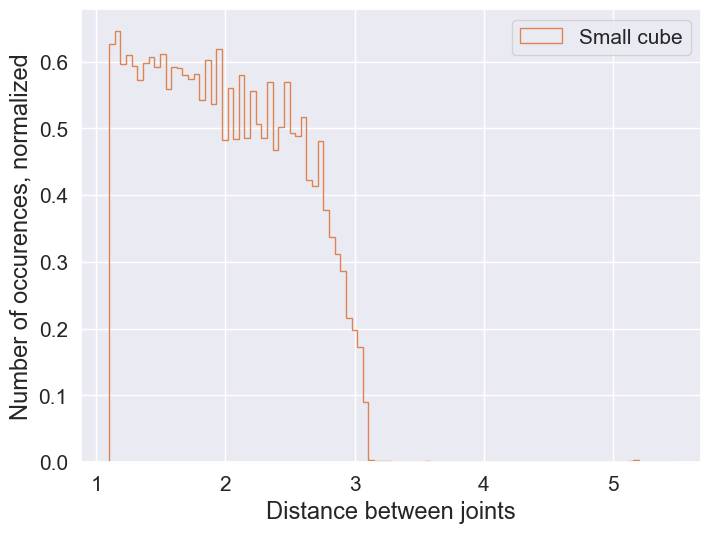

In [13]:
# Histogram: Small vs Big Cube
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(long_dist_small_cube, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.xlabel("Distance between joints", Fontsize = best_font_size+2)
plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size+2)
# plt.title("Comparing class distributions")
#create legend
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Small cube"]
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(labels, prop={"size":best_font_size})
plt.savefig(folder_saving_str_small_cube + "/long_dist_small_cube_normalized.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


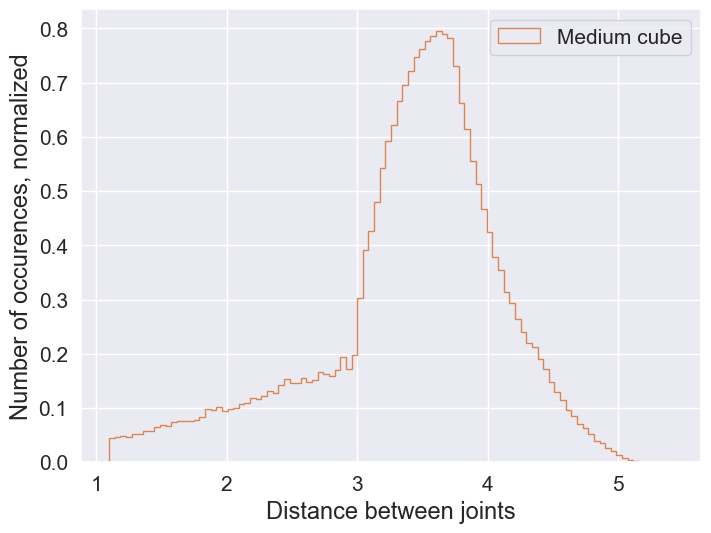

In [14]:
# Histogram: Small vs Big Cube
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(long_dist_medium_cube, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.xlabel("Distance between joints", Fontsize = best_font_size+2)
plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size+2)
# plt.title("Comparing class distributions")
#create legend
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Medium cube"]
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(labels, prop={"size":best_font_size})
plt.savefig(folder_saving_str_medium_cube + "/long_dist_medium_cube_normalized.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


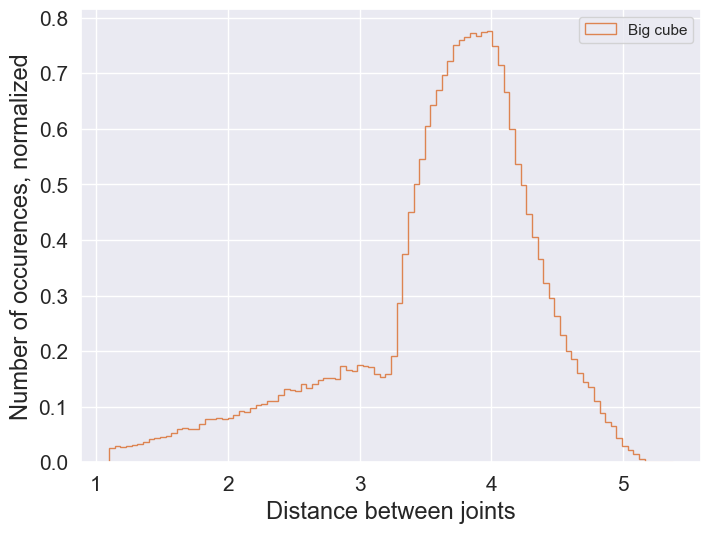

In [17]:
# Histogram: Small vs Big Cube
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(long_dist_big_cube, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.xlabel("Distance between joints", Fontsize = best_font_size+2)
plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size+2)
# plt.title("Comparing class distributions")
#create legend
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
labels= ["Big cube"]
plt.legend(labels, prop={"size":best_font_size})
plt.legend(labels)
plt.savefig(folder_saving_str_big_cube + "/long_dist_big_cube_normalized.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


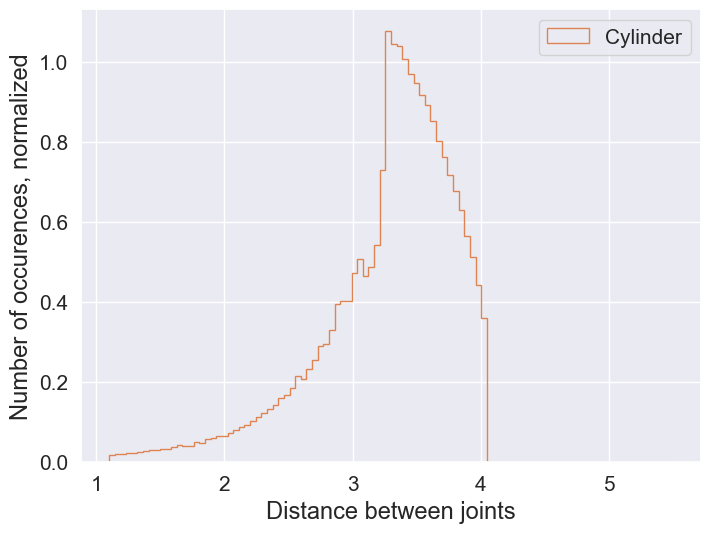

In [18]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(long_dist_cyli, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.xlabel("Distance between joints", Fontsize = best_font_size+2)
plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size+2)
# plt.title("Comparing class distributions")
#create legend
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Cylinder"]
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(labels, prop={"size":best_font_size})
plt.savefig(folder_saving_str_cyli + "/long_dist_cyli_cube_normalized.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


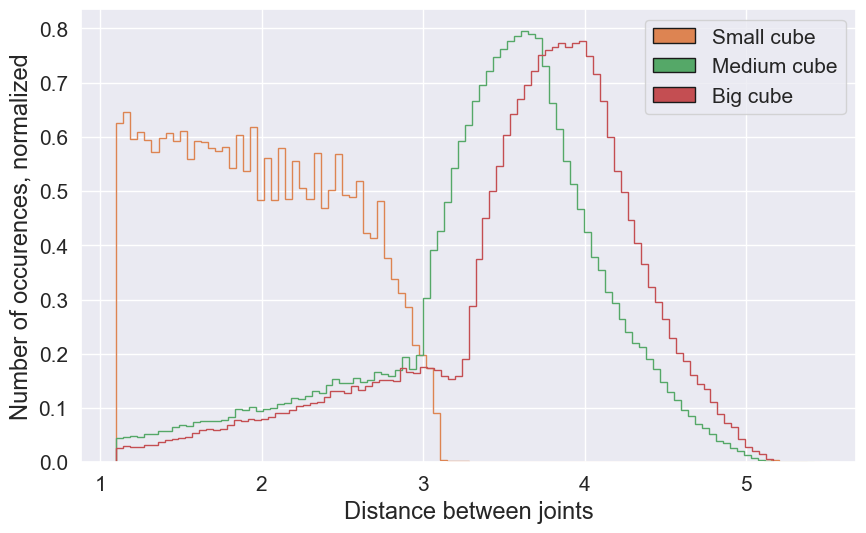

In [19]:
# Histogram, all 3 cubes! 
plt.figure(figsize=(10, 6), dpi=100)
plt.hist(long_dist_small_cube, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(long_dist_medium_cube, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.hist(long_dist_big_cube, bins=num_bins, density=True, histtype='step', color="C3", stacked=True)
plt.xlabel("Distance between joints", Fontsize = best_font_size+2)
plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size+2)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2", "C3"]]
labels= ["Small cube", "Medium cube", "Big cube"]
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(handles, labels, loc='best', prop={"size":best_font_size})
plt.savefig(folder_saving_str_general + "/Histogram_all_cubes_J.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


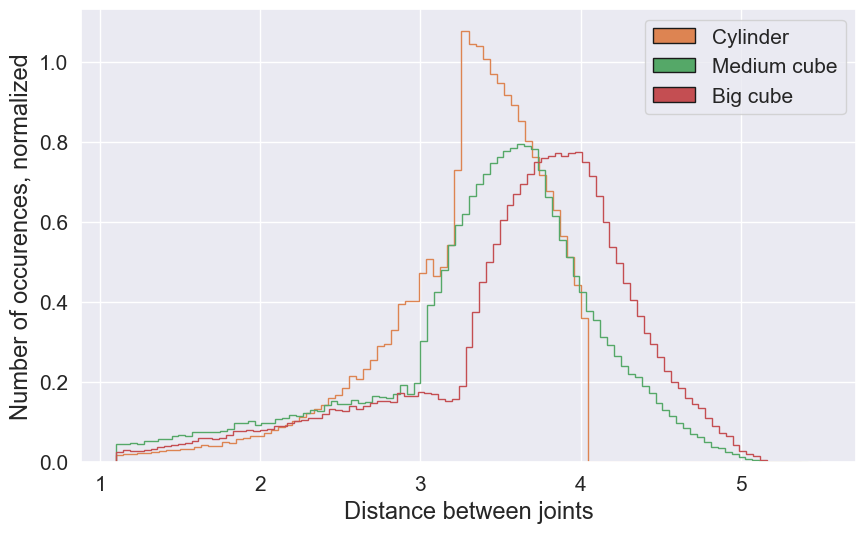

In [20]:
# Histogram, all 3 cubes! 
plt.figure(figsize=(10, 6), dpi=100)
plt.hist(long_dist_cyli, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(long_dist_medium_cube, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.hist(long_dist_big_cube, bins=num_bins, density=True, histtype='step', color="C3", stacked=True)
plt.xlabel("Distance between joints", Fontsize = best_font_size+2)
plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size+2)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2", "C3"]]
labels= ["Cylinder", "Medium cube", "Big cube"]
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(handles, labels, loc='best', prop={"size":best_font_size})
plt.savefig(folder_saving_str_general + "/Histogram_cylinder_and_cubes_J.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


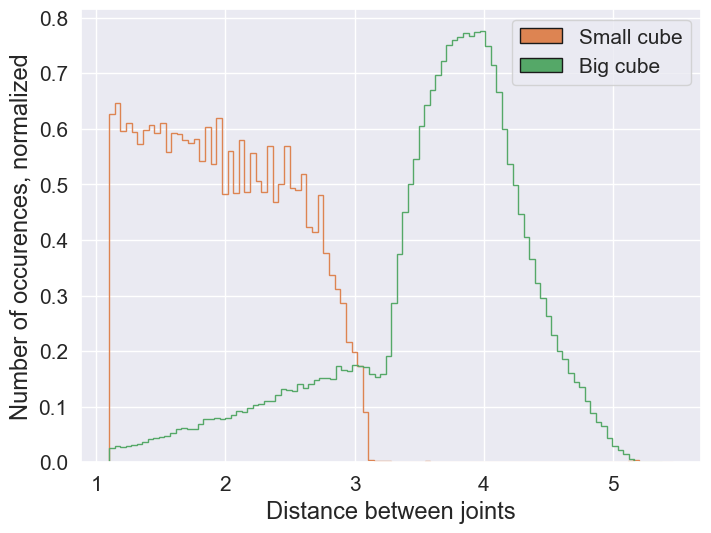

In [22]:
# Histogram: Small vs Big Cube
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(long_dist_small_cube, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(long_dist_big_cube, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.xlabel("Distance between joints", Fontsize = best_font_size+2)
plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size+2)
# plt.title("Comparing class distributions")
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Small cube","Big cube"]
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(handles, labels, prop={"size":best_font_size})
plt.savefig(folder_saving_str_general + "/Comparing_long_dist_small_big_normalized.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


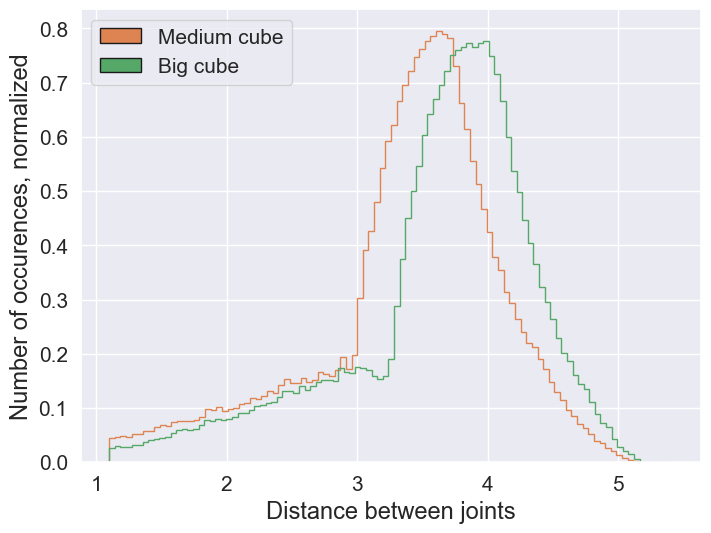

In [23]:
# Histogram: Medium vs Big Cube
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(long_dist_medium_cube, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(long_dist_big_cube, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.xlabel("Distance between joints", Fontsize = best_font_size+2)
plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size+2)
# plt.title("Comparing class distributions")
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Medium cube","Big cube"]
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(handles, labels, loc='upper left', prop={"size":best_font_size})
plt.savefig(folder_saving_str_general + "/Comparing_long_dist_medium_big_normalized.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


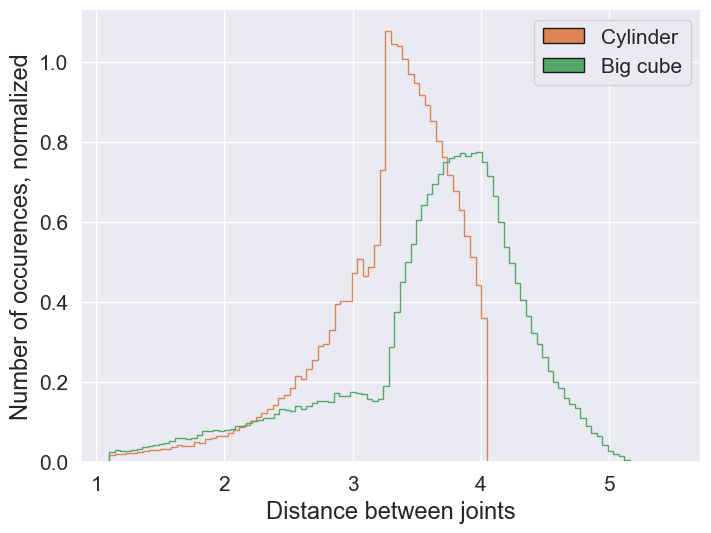

In [25]:
# Histogram: Cylinder vs Big Cube
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(long_dist_cyli, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(long_dist_big_cube, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.xlabel("Distance between joints", Fontsize = best_font_size+2)
plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size+2)
#plt.title("Comparing class distributions")
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Cylinder","Big cube"]
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.legend(handles, labels, prop={"size":best_font_size})
plt.savefig(folder_saving_str_general + "/Comparing_long_dist_cylinder_big_normalized.png")
plt.show()

### Gripper hand positions 

#### X-position vs. Y-positions 

In [29]:
sns.set(font_scale = 1.5)

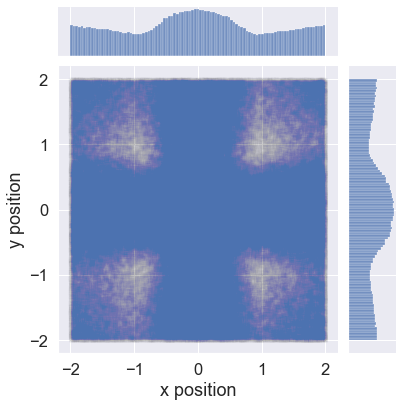

In [30]:
# Big Cube 
df = pd.DataFrame({"x position": x_pos_big_cube, "y position": y_pos_big_cube})
h = sns.jointplot(data=df, x="x position", y="y position", alpha = 0.002)
h.savefig(folder_saving_str_big_cube + "/Jointplot_XY_big_normalized.png")
plt.show()

Heatmap 

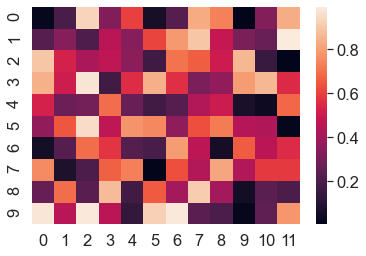

In [31]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [32]:
ax = sns.heatmap(heatmap_test)

NameError: name 'heatmap_test' is not defined

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

In [ ]:
print(type(flights))

In [54]:
from pandas import DataFrame


In [55]:
res = 300
index = []
columns = []
tmp_ctr = -2.0
incr = 0.01
for _ in range(res): 
    # index.append(str(round(tmp_ctr, 2)))
    # columns.append(str(round(tmp_ctr, 2)))
    index.append("")
    columns.append("")
    tmp_ctr += incr

In [56]:
heatmap_test = np.zeros((res,res))
for tmp_id in range(len(x_pos_big_cube)):
    tmp_pos_x_heatmap = int((x_pos_big_cube[tmp_id] + 2) * (res/4))
    tmp_pos_y_heatmap = int((y_pos_big_cube[tmp_id] + 2) * (res/4))
    heatmap_test[tmp_pos_x_heatmap,tmp_pos_y_heatmap] += 1 

In [57]:
df = DataFrame(heatmap_test, index=index, columns=columns)

<AxesSubplot:>

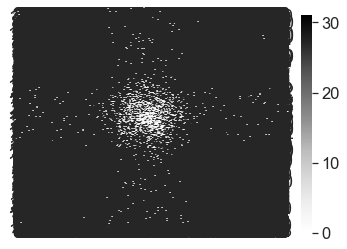

In [58]:
sns.heatmap(df, annot=True, cmap="Greys")

In [1]:
# sns.heatmap(df)
plt.pcolor(df)
plt.figure(figsize=(8, 8), dpi=100)
#plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
#plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

NameError: name 'plt' is not defined

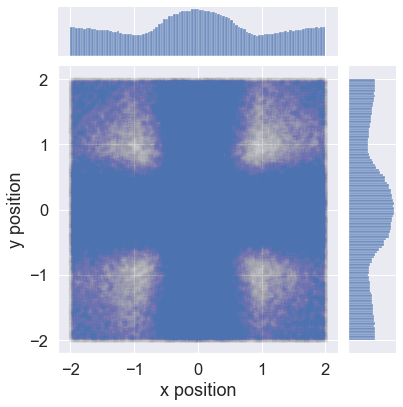

In [39]:
# Big Cube 
df = pd.DataFrame({"x position": non_zero_x_big_cube, "y position": non_zero_y_big_cube})
h = sns.jointplot(data=df, x="x position", y="y position", alpha = 0.005)
h.savefig(folder_saving_str_big_cube + "/Jointplot_XY_big_NON_ZERO_normalized.png")
plt.show()

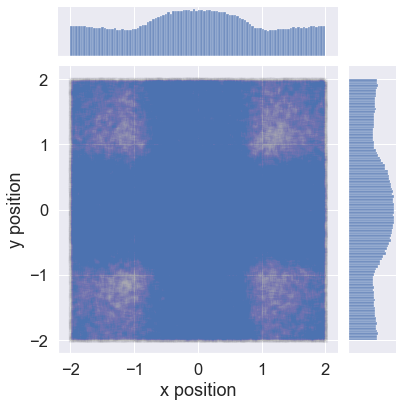

In [40]:
# Medium Cube 
df = pd.DataFrame({"x position": x_pos_medium_cube, "y position": y_pos_medium_cube})
h = sns.jointplot(data=df, x="x position", y="y position", alpha = 0.005)
h.savefig(folder_saving_str_medium_cube + "/Jointplot_XY_medium_normalized.png")
plt.show()

In [2]:
# Medium Cube 
df = pd.DataFrame({"x position": non_zero_x_medium_cube[:10000], "y position": non_zero_y_medium_cube[:10000]})
h = sns.jointplot(data=df, x="x position", y="y position", alpha = 0.005)
h.savefig(folder_saving_str_medium_cube + "/Jointplot_XY_medium_NON_ZERO_normalized.png")
plt.show()

NameError: name 'pd' is not defined

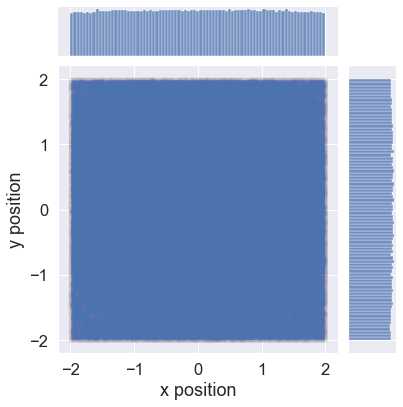

In [42]:
# Small Cube 
df = pd.DataFrame({"x position": x_pos_small_cube, "y position": y_pos_small_cube})
h = sns.jointplot(data=df, x="x position", y="y position", alpha = 0.005)
h.savefig(folder_saving_str_small_cube + "/Jointplot_XY_small_normalized.png")
plt.show()

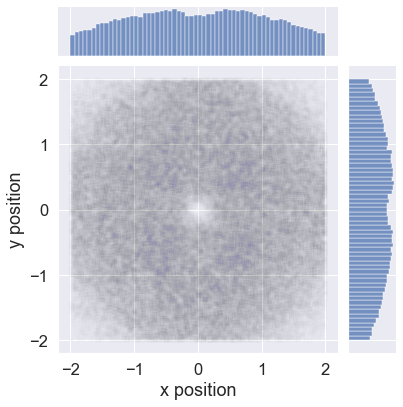

In [43]:
# Small Cube 
df = pd.DataFrame({"x position": non_zero_x_small_cube, "y position": non_zero_y_small_cube})
h = sns.jointplot(data=df, x="x position", y="y position", alpha = 0.005)
h.savefig(folder_saving_str_small_cube + "/Jointplot_XY_small_NON_ZERO_normalized.png")
plt.show()

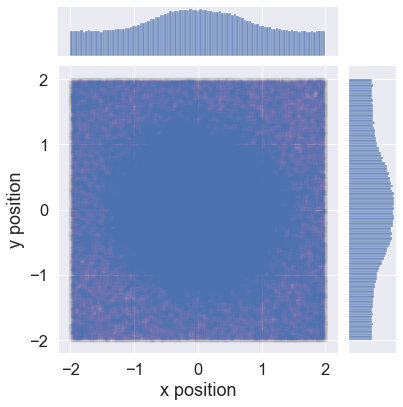

In [44]:
# Cylinder
df = pd.DataFrame({"x position": x_pos_cyli, "y position": y_pos_cyli})
h = sns.jointplot(data=df, x="x position", y="y position", alpha = 0.005)
h.savefig(folder_saving_str_cyli + "/Jointplot_XY_cyli_normalized.png")
plt.show()

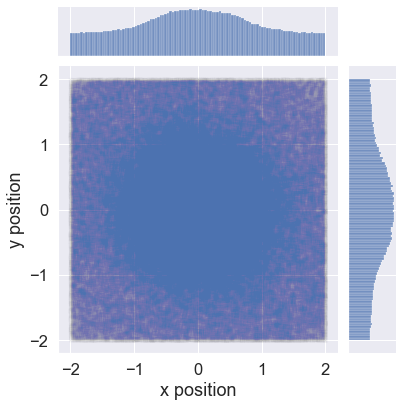

In [45]:
# Cylinder
df = pd.DataFrame({"x position": non_zero_x_cyli, "y position": non_zero_y_cyli})
h = sns.jointplot(data=df, x="x position", y="y position", alpha = 0.005)
h.savefig(folder_saving_str_cyli + "/Jointplot_XY_cyli_NON_ZERO_normalized.png")
plt.show()

#### X-position vs. Z-positions 

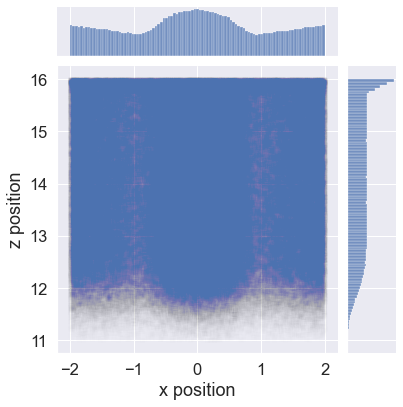

In [46]:
# Big Cube 
df = pd.DataFrame({"x position": x_pos_big_cube, "z position": z_pos_big_cube})
h = sns.jointplot(data=df, x="x position", y="z position", alpha = 0.005)
h.savefig(folder_saving_str_big_cube + "/Jointplot_XZ_big_normalized.png")
plt.show()

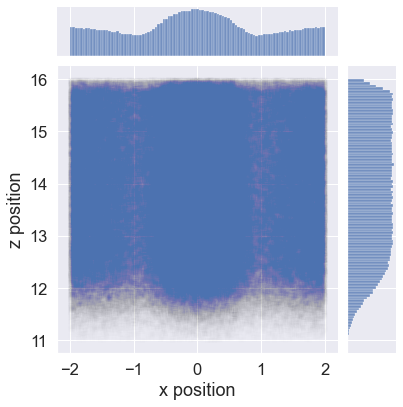

In [47]:
# Big Cube 
df = pd.DataFrame({"x position": non_zero_x_big_cube, "z position": non_zero_z_big_cube})
h = sns.jointplot(data=df, x="x position", y="z position", alpha = 0.005)
h.savefig(folder_saving_str_big_cube + "/Jointplot_XZ_big_NON_ZERO_normalized.png")
plt.show()

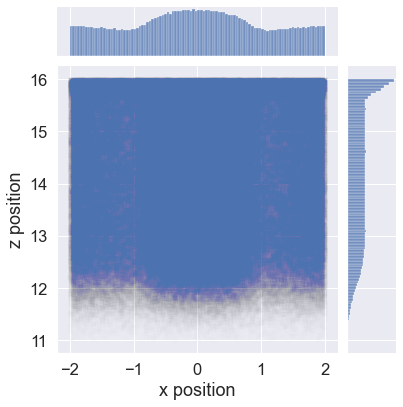

In [48]:
# Medium Cube 
df = pd.DataFrame({"x position": x_pos_medium_cube, "z position": z_pos_medium_cube})
h = sns.jointplot(data=df, x="x position", y="z position", alpha = 0.005)
h.savefig(folder_saving_str_medium_cube + "/Jointplot_XZ_medium_normalized.png")
plt.show()

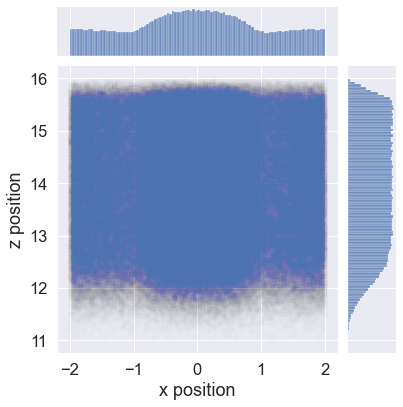

In [49]:
# Medium Cube 
df = pd.DataFrame({"x position": non_zero_x_medium_cube, "z position": non_zero_z_medium_cube})
h = sns.jointplot(data=df, x="x position", y="z position", alpha = 0.005)
h.savefig(folder_saving_str_medium_cube + "/Jointplot_XZ_medium_NON_ZERO_normalized.png")
plt.show()

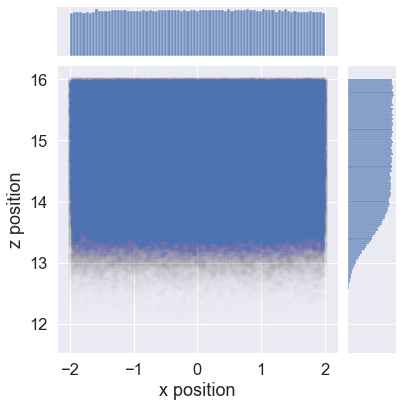

In [50]:
# Small Cube
df = pd.DataFrame({"x position": x_pos_small_cube, "z position": z_pos_small_cube})
h = sns.jointplot(data=df, x="x position", y="z position", alpha = 0.005)
h.savefig(folder_saving_str_small_cube + "/Jointplot_XZ_small_normalized.png")
plt.show()

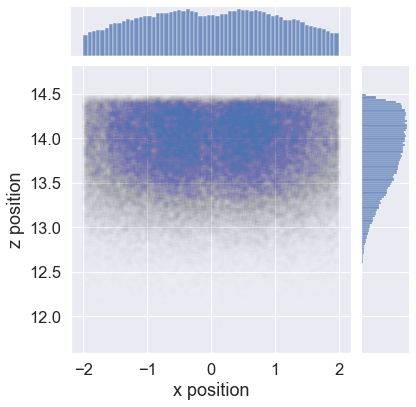

In [51]:
# Small Cube
df = pd.DataFrame({"x position": non_zero_x_small_cube, "z position": non_zero_z_small_cube})
h = sns.jointplot(data=df, x="x position", y="z position", alpha = 0.005)
h.savefig(folder_saving_str_small_cube + "/Jointplot_XZ_small_NON_ZERO_normalized.png")
plt.show()

#### X-position vs. Joint distance

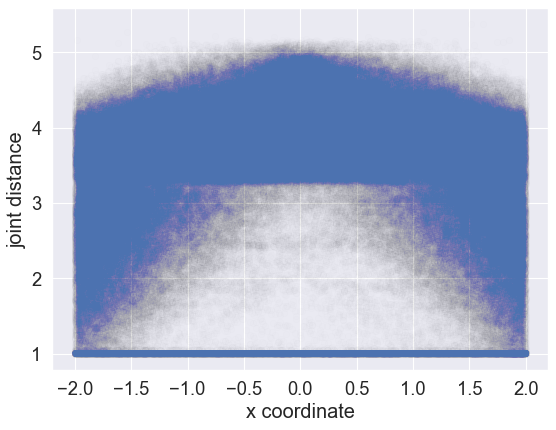

In [52]:
# Big Cube 
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x_pos_big_cube, dist_big_cube,  alpha = 0.005)
plt.xlabel("x coordinate")
plt.ylabel("joint distance")
plt.title("")
plt.savefig(folder_saving_str_big_cube + "/Jointplot_TX_big_normalized.png")
plt.show()

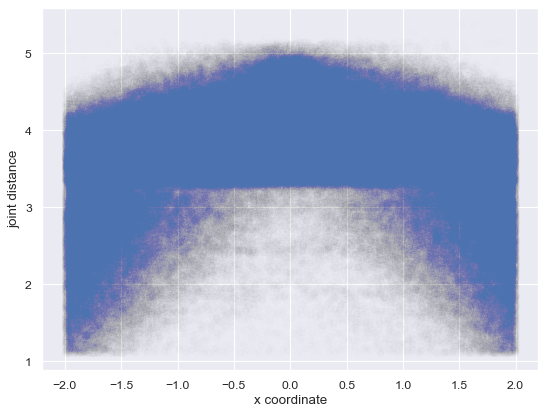

In [54]:
# Big Cube 
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(non_zero_x_big_cube, long_dist_big_cube,  alpha = 0.005)
plt.xlabel("x coordinate")
plt.ylabel("joint distance")
plt.title("")
plt.savefig(folder_saving_str_big_cube + "/Jointplot_TX_big_NON_ZERO_normalized.png")
plt.show()

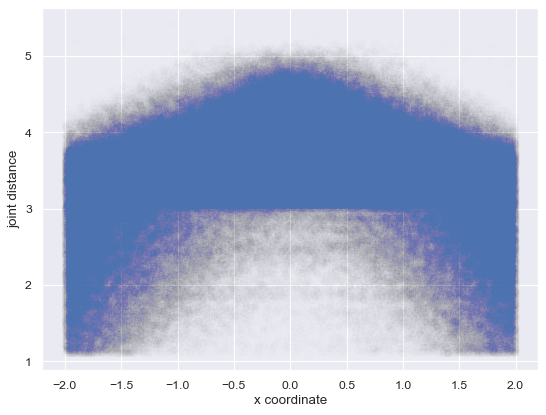

In [55]:
# Medium Cube 
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(non_zero_x_medium_cube, long_dist_medium_cube,  alpha = 0.005)
plt.xlabel("x coordinate")
plt.ylabel("joint distance")
plt.title("")
plt.savefig(folder_saving_str_medium_cube + "/Jointplot_TX_medium_NON_ZERO_normalized.png")
plt.show()

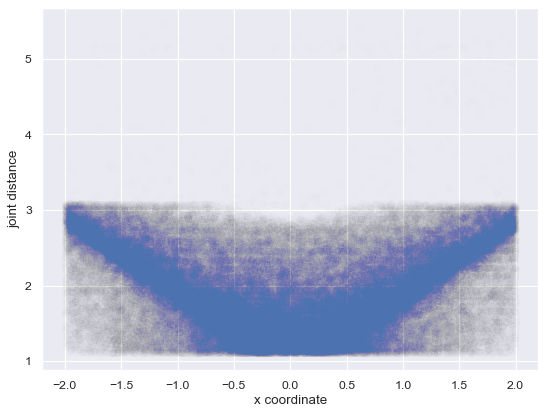

In [56]:
# Small Cube 
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(non_zero_x_small_cube, long_dist_small_cube,  alpha = 0.005)
plt.xlabel("x coordinate")
plt.ylabel("joint distance")
plt.title("")
plt.savefig(folder_saving_str_small_cube + "/Jointplot_TX_small_NON_ZERO_normalized.png")
plt.show()

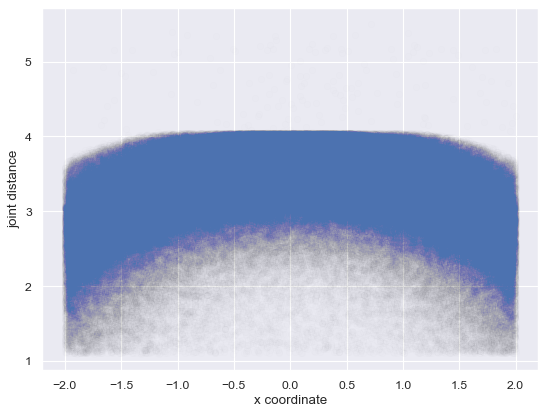

In [57]:
# Cylinder 
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(non_zero_x_cyli, long_dist_cyli,  alpha = 0.005)
plt.xlabel("x coordinate")
plt.ylabel("joint distance")
plt.title("")
plt.savefig(folder_saving_str_cyli + "/Jointplot_TX_cyli_NON_ZERO_normalized.png")
plt.show()

#### Joint distance vs. Z-position

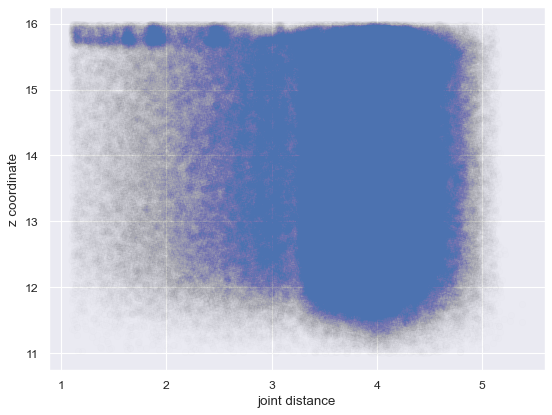

In [58]:
# Big Cube 
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(long_dist_big_cube, non_zero_z_big_cube,  alpha = 0.005)
plt.xlabel("joint distance")
plt.ylabel("z coordinate")
plt.title("")
plt.savefig(folder_saving_str_big_cube + "/Jointplot_TZ_big_NON_ZERO_normalized.png")
plt.show()

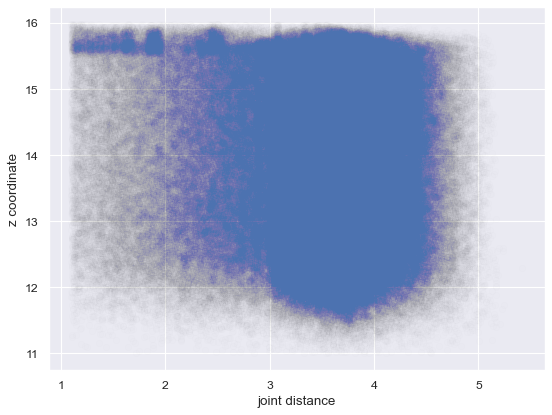

In [59]:
# Medium Cube 
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(long_dist_medium_cube, non_zero_z_medium_cube,  alpha = 0.005)
plt.xlabel("joint distance")
plt.ylabel("z coordinate")
plt.title("")
plt.savefig(folder_saving_str_medium_cube + "/Jointplot_TZ_medium_NON_ZERO_normalized.png")
plt.show()

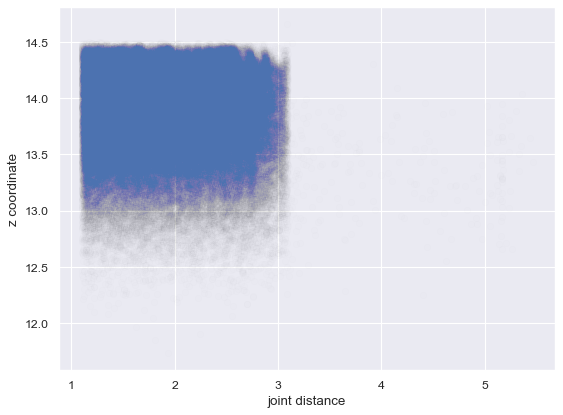

In [62]:
# Small Cube 
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(long_dist_small_cube, non_zero_z_small_cube,  alpha = 0.005)
plt.xlabel("joint distance")
plt.ylabel("z coordinate")
plt.title("")
plt.savefig(folder_saving_str_small_cube + "/Jointplot_TZ_small_NON_ZERO_normalized.png")
plt.show()

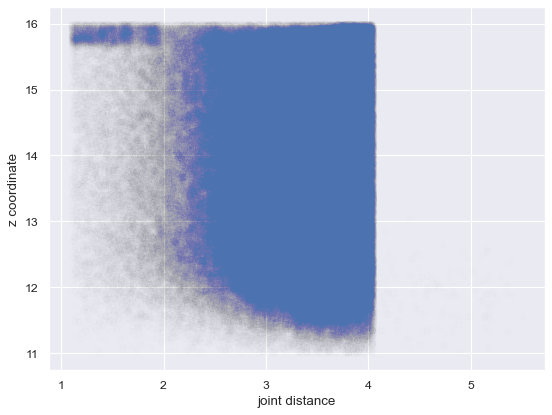

In [63]:
# Cylindre  
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(long_dist_cyli, non_zero_z_cyli,  alpha = 0.005)
plt.xlabel("joint distance")
plt.ylabel("z coordinate")
plt.title("")
plt.savefig(folder_saving_str_cyli + "/Jointplot_TZ_cyli_NON_ZERO_normalized.png")
plt.show()

## Misc 

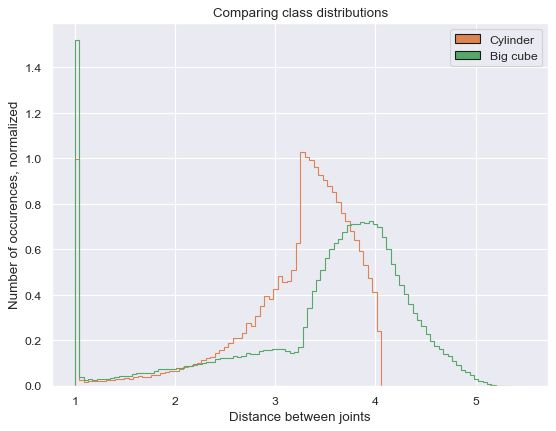

In [64]:
# Histogram: Cylinder vs Big Cube
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(dist_cyli, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(dist_big_cube, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.xlabel("Distance between joints")
plt.ylabel("Number of occurences, normalized")
plt.title("Comparing class distributions")
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Cylinder","Big cube"]
plt.legend(handles, labels)
plt.savefig(folder_saving_str_general + "/Comparing_ALL_dist_cylinder_big.png")
plt.show()